<a href="https://colab.research.google.com/github/RaymondUW2023/NN-Group-Project-Team-14/blob/main/Data_Augmentation_and_Preprocessing_Example_Raymond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Examples of PCA followed from Tensorflow website and syntax used from ChatGPT

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


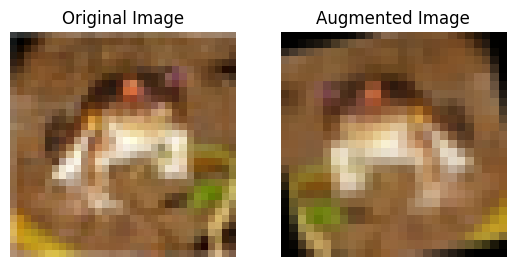

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_data_augmentation(image):
    # Random horizontal flip
    if np.random.rand() < 0.5:
        image = np.fliplr(image)

    # Random rotation (angle in degrees)
    rotation_angle = np.random.uniform(-20, 20)
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
    image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Random zoom
    zoom_factor = np.random.uniform(0.8, 1.2)
    image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)

    return image

# Load an example image from CIFAR-10 (replace this with your image loading code)
example_image = train_images[0]

# Display the original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(example_image)
plt.axis('off')

# Apply data augmentation to the image
augmented_image = apply_data_augmentation(example_image)

# Display the augmented image
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(augmented_image)
plt.axis('off')

plt.show()

In [20]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

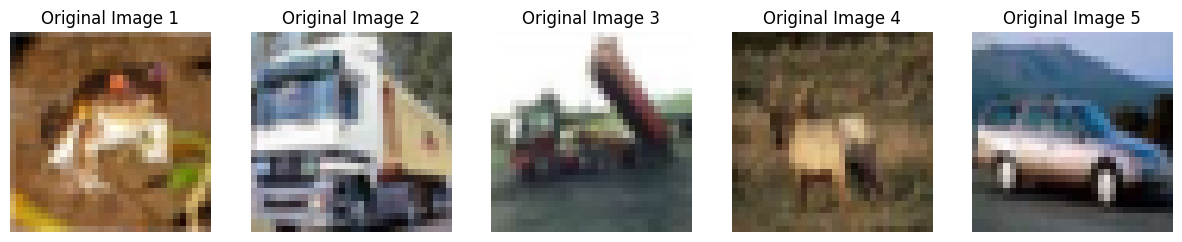

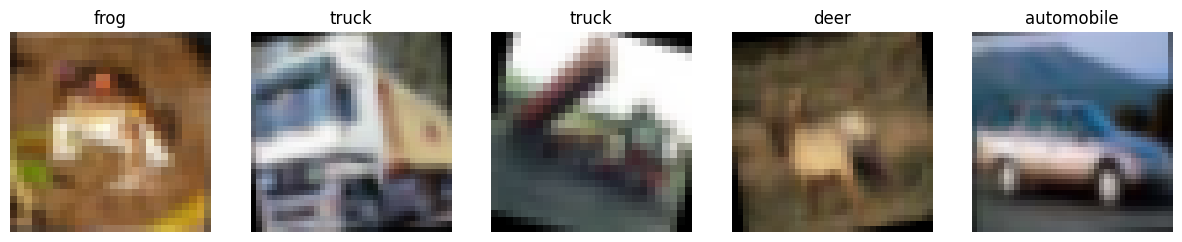

In [21]:
#Mulitple Images at once
import numpy as np
import cv2
import matplotlib.pyplot as plt

def apply_data_augmentation(image):
    # Random horizontal flip
    if np.random.rand() < 0.5:
        image = np.fliplr(image)

    # Random rotation (angle in degrees)
    rotation_angle = np.random.uniform(-20, 20)
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
    image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

    # Random zoom
    zoom_factor = np.random.uniform(0.8, 1.2)
    image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)

    return image



# Number of images to augment
num_images_to_augment = 5

# Display the original images
plt.figure(figsize=(15, 3))
for i in range(num_images_to_augment):
    plt.subplot(1, num_images_to_augment, i + 1)
    plt.title(f'Original Image {i+1}')
    plt.imshow(train_images[i])
    plt.axis('off')

# Apply data augmentation to each image
augmented_images = []
for i in range(num_images_to_augment):
    augmented_image = apply_data_augmentation(train_images[i])
    augmented_images.append(augmented_image)

# Display the augmented images
plt.figure(figsize=(15, 3))
for i, augmented_image in enumerate(augmented_images):
    plt.subplot(1, num_images_to_augment, i + 1)
    plt.title(class_names[train_labels[i][0]])
    plt.imshow(augmented_image)
    plt.axis('off')

plt.show()

In [50]:
# Does the Data Augmentation and Preprocess that data with GCA wich the Paper used.

import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

def global_contrast_normalization(image):
    # Flatten the image to 1D array
    flat_image = image.flatten()

    # Apply global contrast normalization
    normalized_image = exposure.equalize_hist(flat_image)

    # Reshape the normalized image back to its original shape
    normalized_image = normalized_image.reshape(image.shape)

    return normalized_image

def apply_data_augmentation(image, horizontal_flip=True, vertical_flip=False):
    # Random horizontal flip
    if horizontal_flip and np.random.rand() < 0.5:
        image = np.fliplr(image)

    # Random vertical flip
    if vertical_flip and np.random.rand() < 0.5:
        image = np.flipud(image)

    # Other augmentation techniques (rotation, zoom, etc.) can be added here

    return image

# Load CIFAR-10 data
x_train = train_images

# Number of images to augment and preprocess
num_images_to_augment = 50000



# Apply data augmentation with horizontal and vertical flips to each image
augmented_images = []
for i in range(num_images_to_augment):
    augmented_image = apply_data_augmentation(x_train[i], horizontal_flip=True, vertical_flip=True)
    augmented_images.append(augmented_image)



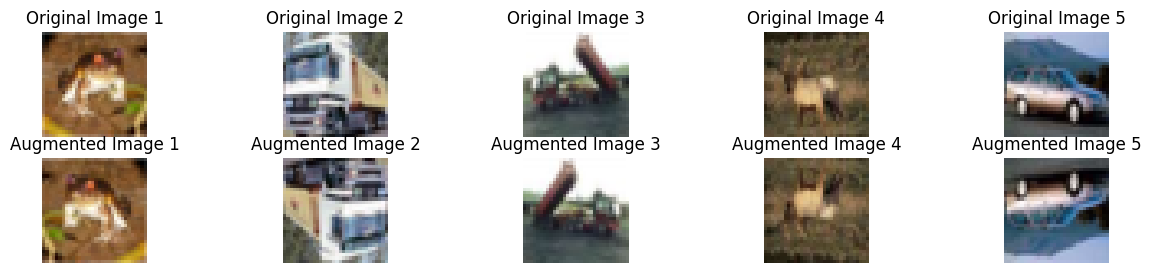

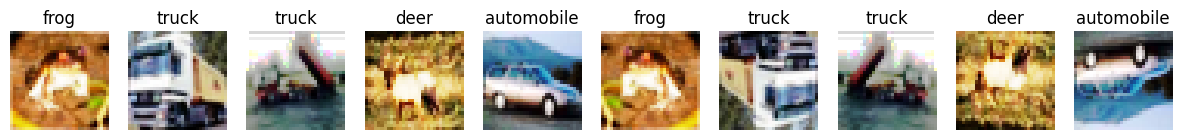

In [49]:
# Display the original images
num_images_to_augment = 5

plt.figure(figsize=(15, 3))
for i in range(num_images_to_augment):
    plt.subplot(2, num_images_to_augment, i + 1)
    plt.title(f'Original Image {i+1}')
    plt.imshow(x_train[i])
    plt.axis('off')
    if i == 5:
      break

# Display the augmented images
for i, augmented_image in enumerate(augmented_images):
    plt.subplot(2, num_images_to_augment, num_images_to_augment + i + 1)
    plt.title(f'Augmented Image {i+1}')
    plt.imshow(augmented_image)
    plt.axis('off')
    if i == 4:
      break

# Apply Global Contrast Normalization to the original and augmented images
all_images = np.concatenate([x_train[:num_images_to_augment], augmented_images], axis=0)
normalized_images = np.array([global_contrast_normalization(img) for img in all_images])

# Display the preprocessed images
plt.figure(figsize=(15, 3))
for i, preprocessed_image in enumerate(normalized_images):
    plt.subplot(1, num_images_to_augment * 2, i + 1)
    plt.title(class_names[train_labels[i][0]])
    if i > 4:
      plt.title(class_names[train_labels[i-5][0]])
    plt.imshow(preprocessed_image)
    plt.axis('off')
    if i == num_images_to_augment*2-1:
      break

plt.show()


In [51]:
np.shape(augmented_images)

(50000, 32, 32, 3)